In [15]:
from epilepsypcm.utils.make_df import make_df, get_df_list, concat_dfs
from epilepsypcm.models.base_models import *
from sklearn.metrics import auc

In [16]:
#Location
base_path = '/Users/richardlee/Desktop/2021 Fall/Precision Care Medicine/Coding/' #modify for your file location

#Function to get a list of all dataframes for all positive patients, in the format [patient number, df]
df_list = get_df_list(base_path, "1")

#Function to get the concatenated dataframe for all positive patients
## balance parameter can be changed to "None", "upsample", or "downsample"
all_positive_patients = concat_dfs(base_path, "1", balance = "Downsample")

In [17]:
all_positive_patients.head()

,chNames,significant,n1Zscore,n2Zscore,p2Zscore,n1Latency,n2Latency,p2Latency,flipped,outcome
1411,LND04_LND05,0.0,-2.301832,-1.443158,1.447502,13.0,299.0,240.0,0.0,0.0
294,LS1_LS2,0.0,-5.508342,-3.288582,5.815752,13.0,330.0,99.0,0.0,0.0
831,BLL03_BLL04,1.0,8.307225,12.616531,-3.969246,34.0,149.0,66.0,1.0,0.0
1771,LFOA4_LFOA5,0.0,-1.767562,-2.465599,0.163528,38.0,234.0,176.0,0.0,0.0
618,LHA09_LHA10,0.0,0.577694,0.432203,0.244269,62.0,238.0,204.0,1.0,0.0


In [18]:
df_list

[['PY21N008',
          chNames  significant  n1Zscore  n2Zscore  p2Zscore  n1Latency  \
  2       LA3_LA4          0.0  1.396644  1.062212 -5.025081       13.0   
  6       LA7_LA8          0.0  1.371992  1.735958 -0.305671       17.0   
  7       LA8_LA9          0.0  1.990935  0.596185  0.596185       19.0   
  10    LAH2_LAH3          0.0  4.324042  4.524443 -1.176967       16.0   
  11    LAH3_LAH4          0.0  4.214433  2.351241 -1.154445       15.0   
  ...         ...          ...       ...       ...       ...        ...   
  2815  RAH4_RAH5          0.0 -4.623911  0.930344  4.126570       11.0   
  2816  RAH5_RAH6          0.0 -0.006959 -3.854115 -0.006959       51.0   
  2817  RAH6_RAH7          0.0 -3.899049  0.688887  0.688887       11.0   
  2818  RAH7_RAH8          0.0  2.489016  1.919793  0.472198       13.0   
  2819  RAH8_RAH9          0.0  2.600048  3.240657  1.017700       11.0   
  
        n2Latency  p2Latency  flipped  outcome  
  2         180.0       43.0      

In [5]:
# code to filter by significance column (|n1Zscore| >= 6)

'''
all_positive_patients = all_positive_patients.loc[all_positive_patients["significant12"] == 1.0]
all_positive_patients.head()
all_positive_patients["outcome"].value_counts()
'''

'\nall_positive_patients = all_positive_patients.loc[all_positive_patients["significant12"] == 1.0]\nall_positive_patients.head()\nall_positive_patients["outcome"].value_counts()\n'

In [6]:
#code to filter by n1 value

'''
all_positive_patients = all_positive_patients.reset_index()

all_positive_patients["significant12"] = 0.0
for ind in all_positive_patients.index:
    if (all_positive_patients.loc[ind]["n1Zscore"] >= 12.0) | (all_positive_patients.loc[ind]["n1Zscore"] <= -12.0):
        all_positive_patients["significant12"][ind] = 1.0

all_positive_patients = all_positive_patients.loc[all_positive_patients["significant12"] == 1.0]
all_positive_patients.head()
all_positive_patients["outcome"].value_counts()
'''

'\nall_positive_patients = all_positive_patients.reset_index()\n\nall_positive_patients["significant12"] = 0.0\nfor ind in all_positive_patients.index:\n    if (all_positive_patients.loc[ind]["n1Zscore"] >= 12.0) | (all_positive_patients.loc[ind]["n1Zscore"] <= -12.0):\n        all_positive_patients["significant12"][ind] = 1.0\n\nall_positive_patients = all_positive_patients.loc[all_positive_patients["significant12"] == 1.0]\nall_positive_patients.head()\nall_positive_patients["outcome"].value_counts()\n'

# All Models

### ROC Curves

Linear Regression - Number of mislabeled points out of a total 831 points : 391
Naive Bayes - Number of mislabeled points out of a total 831 points : 409
Random Forest - Number of mislabeled points out of a total 831 points : 364
XGBoost - Number of mislabeled points out of a total 831 points : 378
Adaboost - Number of mislabeled points out of a total 831 points : 368
SVM - Number of mislabeled points out of a total 831 points : 404


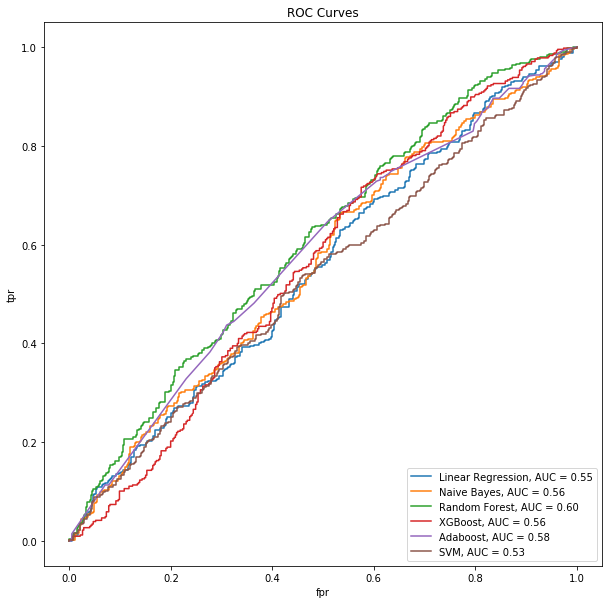

In [7]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#linear regression
lr, tpr, fpr, precision, recall = linear_regression(all_positive_patients, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Linear Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, tpr, fpr, precision, recall = naive_bayes(all_positive_patients, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, tpr, fpr, precision, recall = random_forest(all_positive_patients, max_depth, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, tpr, fpr, precision, recall = xgboost(all_positive_patients, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, tpr, fpr, precision, recall = adaboost(all_positive_patients, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, tpr, fpr, precision, recall = svm(all_positive_patients, C, epsilon, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



### PR Curves

Linear Regression - Number of mislabeled points out of a total 831 points : 391
Naive Bayes - Number of mislabeled points out of a total 831 points : 409
Random Forest - Number of mislabeled points out of a total 831 points : 364
XGBoost - Number of mislabeled points out of a total 831 points : 378
Adaboost - Number of mislabeled points out of a total 831 points : 368
SVM - Number of mislabeled points out of a total 831 points : 404


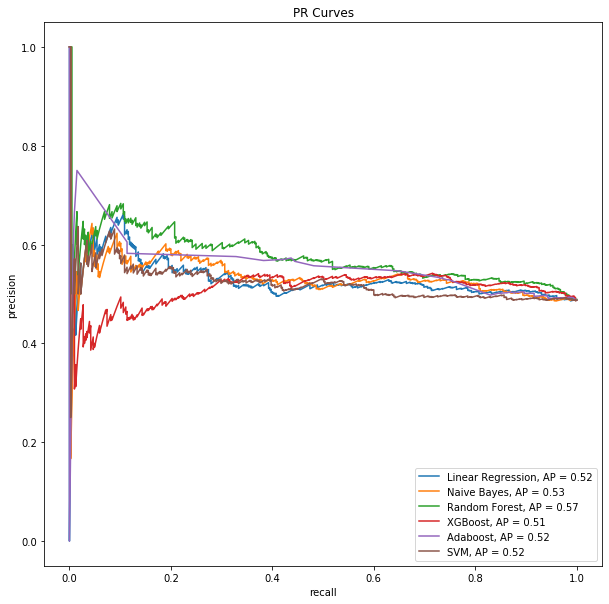

In [8]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#linear regression
lr, tpr, fpr, precision, recall = linear_regression(all_positive_patients, plot_roc, plot_pr)
plt.plot(recall, precision, label='Linear Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, tpr, fpr, precision, recall = naive_bayes(all_positive_patients, plot_roc, plot_pr)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, tpr, fpr, precision, recall = random_forest(all_positive_patients, max_depth, plot_roc, plot_pr)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, tpr, fpr, precision, recall = xgboost(all_positive_patients, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, tpr, fpr, precision, recall = adaboost(all_positive_patients, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, tpr, fpr, precision, recall = svm(all_positive_patients, C, epsilon, plot_roc, plot_pr)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

# Individual Models

### Linear Regression

Linear Regression - Number of mislabeled points out of a total 831 points : 391


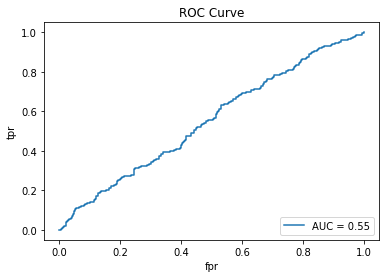

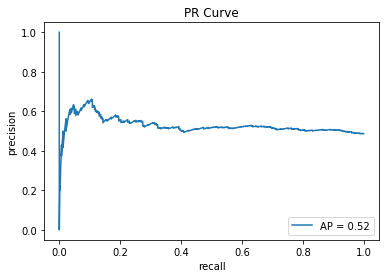

In [9]:
plot_roc = True
plot_pr = True

lr, tpr, fpr, precision, recall = linear_regression(all_positive_patients, plot_roc, plot_pr)

### Naive Bayes

Naive Bayes - Number of mislabeled points out of a total 831 points : 409


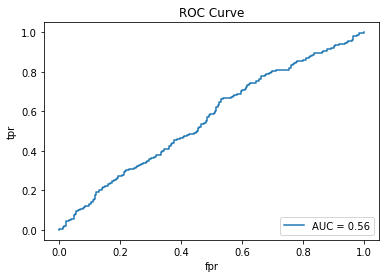

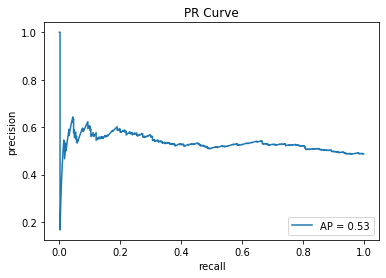

In [10]:
plot_roc = True
plot_pr = True
gnb, tpr, fpr, precision, recall = naive_bayes(all_positive_patients, plot_roc, plot_pr)

### Random Forest

Random Forest - Number of mislabeled points out of a total 831 points : 364


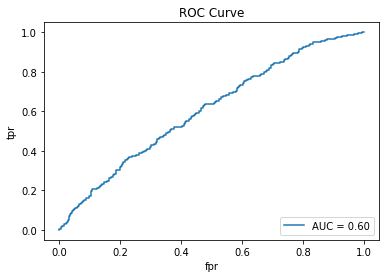

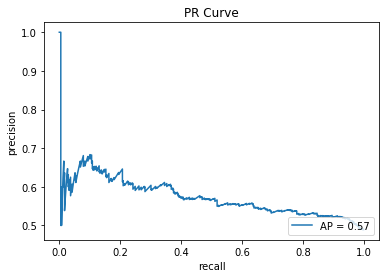

In [11]:
max_depth = 10
plot_roc = True
plot_pr = True
rf, tpr, fpr, precision, recall = random_forest(all_positive_patients, max_depth, plot_roc, plot_pr)

### XGBoost

XGBoost - Number of mislabeled points out of a total 831 points : 378


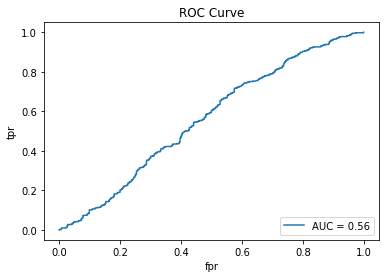

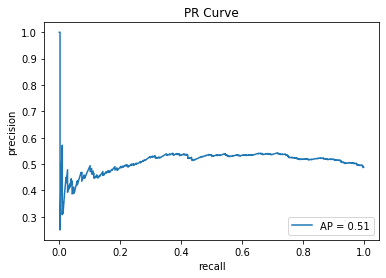

In [12]:
learning_rate = 0.5
max_depth = 10
n_estimators = 10
plot_roc = True
plot_pr = True
xgb, tpr, fpr, precision, recall = xgboost(all_positive_patients, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)

### Adaboost

Adaboost - Number of mislabeled points out of a total 1416 points : 632


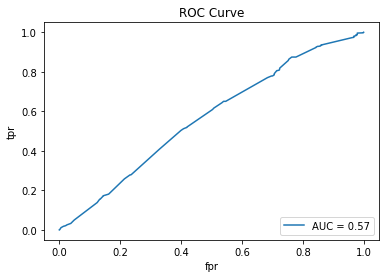

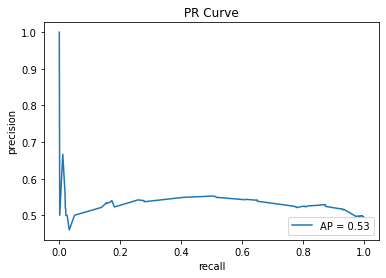

In [12]:
n_estimators = 10
plot_roc = True
plot_pr = True
ada, tpr, fpr, precision, recall = adaboost(all_positive_patients, n_estimators, plot_roc, plot_pr)

### SVM

SVM - Number of mislabeled points out of a total 1416 points : 675


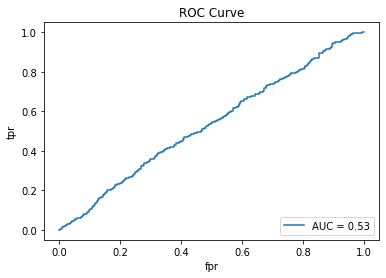

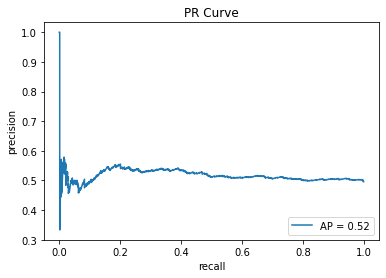

In [13]:
C = 0.7
epsilon = 0.2
plot_roc = True
plot_pr = True
sv, tpr, fpr, precision, recall = svm(all_positive_patients, C, epsilon, plot_roc, plot_pr)

### MLP

### GAN